In [1]:
from pymonntorch import *
from matplotlib import pyplot as plt
import numpy as np
from timeRes import TimeResolution
from current import *
from lif import LIF
from synapse import *
from connections import Connections
# from decision import Decision

In [4]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
ng1 = NeuronGroup(
    100,
    net=net,
    behavior={
        2: ConstantCurrent(value=50),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=100,
        ),
        9: Recorder(variables=["v", "I"], tag="ng1_rec, ng1_recorder"),
        10: EventRecorder("spike", tag="ng1_evrec"),
    },
    tag="NG1",
)


ng2 = NeuronGroup(
    100,
    net=net,
    behavior={
        2: ConstantCurrent(value=25),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=100,
        ),
        9: Recorder(variables=["v", "I"], tag="ng2_rec, ng2_recorder"),
        10: EventRecorder("spike", tag="ng2_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net,
            src=ng1, 
            dst=ng2, 
            behavior={
                5: Connections(def_val=5),
                3: SynFun(),
            })

SynapseGroup['SynapseGroup_1', 'SynapseGroup', 'syn', 'NG1 => NG2'](S100xD100){3:SynFun(),5:Connections(def_val=5,),}

In [5]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)
exc_ng1 = NeuronGroup(
    80,
    net=net,
    behavior={
        2: ConstantCurrent(value=35),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=80,
        ),
        9: Recorder(variables=["v", "I"], tag="exc_ng1_rec, exc_ng1_rcorder"),
        10: EventRecorder("spike", tag="exc_ng1_evrec"),
    },
    tag="exc_NG1",
)


inh_ng1 = NeuronGroup(
    20,
    net=net,
    behavior={
        2: ConstantCurrent(value=10),
        4: InpSyn(),
        6: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=20,
        ),
        9: Recorder(variables=["v", "I"], tag="inh_ng1_rec, inh_ng1_recorder"),
        10: EventRecorder("spike", tag="inh_ng1_evrec"),
    },
    tag="inh_NG2",
)

connect_exc_inh = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=inh_ng1, 
                behavior={
                    3: SynFun(),
                    5: Connections(def_val=100),
                    
                })

connect_inh_exc = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng1, 
                behavior={
                    5: Connections(def_val=100),
                    3: SynFun(is_inhibitory=True),
                })

In [33]:

net = Network(behavior={1: TimeResolution()}, dtype=torch.float64)

exc_ng1 = NeuronGroup(
    80,
    net=net,
    behavior={
        2: ConstantCurrent(value=32),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=80,
        ),
        11: Recorder(variables=["v", "I"], tag="exc_ng1_rec, exc_ng1_rcorder"),
        12: EventRecorder("spike", tag="exc_ng1_evrec"),
    },
    tag="exc_NG1",
)

exc_ng2 = NeuronGroup(
    80,
    net=net,
    behavior={
        2: ConstantCurrent(value=36),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=80,
        ),
        11: Recorder(variables=["v", "I"], tag="exc_ng2_rec, exc_ng2_rcorder"),
        12: EventRecorder("spike", tag="exc_ng2_evrec"),
    },
    tag="exc_NG2",
)


inh_ng1 = NeuronGroup(
    20,
    net=net,
    behavior={
        2: ConstantCurrent(value=10),
        6: InpSyn(),
        10: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-73.42,
            threshold=-35,
            R=1,
            N=20,
        ),
        11: Recorder(variables=["v", "I"], tag="inh_ng1_rec, inh_ng1_recorder"),
        12: EventRecorder("spike", tag="inh_ng1_evrec"),
    },
    tag="inh_NG1",
)


connect_exc2_exc2 = SynapseGroup(net=net,
                src=exc_ng2, 
                dst=exc_ng2, 
                behavior={
                    3: SynFun(),
                    7: Connections(def_val=40),
                    
                })

connect_exc1_exc1 = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=exc_ng1, 
                behavior={
                    3: SynFun(),
                    7: Connections(def_val=40),
                    
                })

connect_inh_exc1 = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng1, 
                behavior={
                    4: SynFun(is_inhibitory=True),
                    8: Connections(def_val=50),
                    
                })



connect_inh_exc2 = SynapseGroup(net=net,
                src=inh_ng1, 
                dst=exc_ng2, 
                behavior={
                    4: SynFun(is_inhibitory=True),
                    8: Connections(def_val=50),
                    
                })


connect_exc2_inh = SynapseGroup(net=net,
                src=exc_ng2, 
                dst=inh_ng1, 
                behavior={
                    5: SynFun(),
                    9: Connections(def_val=40),
                    
                })
connect_exc1_inh = SynapseGroup(net=net,
                src=exc_ng1, 
                dst=inh_ng1, 
                behavior={
                    5: SynFun(),
                    9: Connections(def_val=40),
                    
                })





In [34]:
net.initialize()
net.simulate_iterations(100)

Network['Network_1', 'Network'](Neurons: tensor(180)|3 groups, Synapses: tensor(19200)|6 groups){1:TimeResolution()}
NeuronGroup['exc_NG1', 'NeuronGroup', 'ng'](80){2:ConstantCurrent(value=32,)6:InpSyn()10:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,N=80,)11:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng1_rec, exc_ng1_rcorder,)12:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng1_evrec,arg_0=spike,)}
NeuronGroup['exc_NG2', 'NeuronGroup', 'ng'](80){2:ConstantCurrent(value=36,)6:InpSyn()10:LIF(tau=10,u_rest=-65,u_reset=-73.42,threshold=-35,R=1,N=80,)11:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng2_rec, exc_ng2_rcorder,)12:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=exc_ng2_evrec,arg_0=spike,)}
NeuronGroup['inh_NG1', 'NeuronGroup', 'ng'](20){2:ConstantCurrent(value=10,)6:InpSyn()10:LIF(tau=10,u_rest=-65,u_reset=-73.42,thres

234.00211334228516

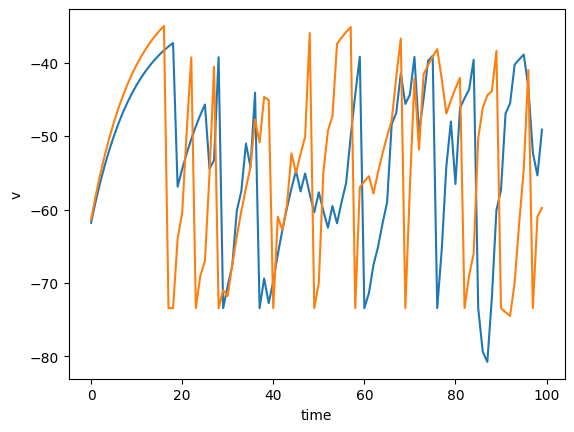

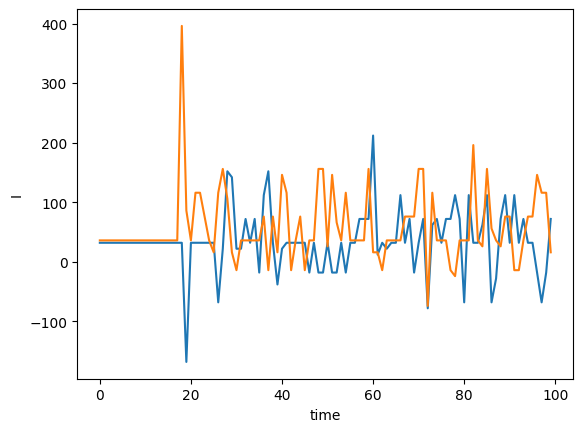

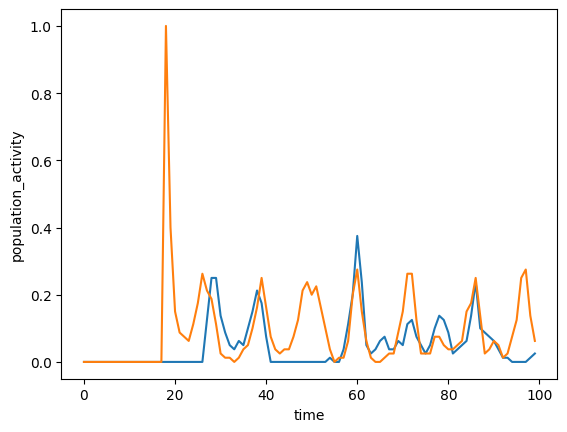

In [35]:
plt.plot(net["v", 0][:, 0])
plt.plot(net["v", 1][:, 0])
# plt.plot(net["v", 2][:, 0])
plt.xlabel("time")
plt.ylabel("v")
plt.show()
plt.plot(net["I", 0][:,0])
plt.plot(net["I", 1][:,0])
# plt.plot(net["I", 2][:,:1])
plt.xlabel("time")
plt.ylabel("I")
plt.show()
# plt.figure(figsize=(10, 7))
# plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
# plt.xlabel("time")
# plt.ylabel("spike")
# x = []
# for w in net["spike", 1]:
#     x.append(w[1] + 80)
# plt.scatter(net["spike", 1][:,0], x)
# # plt.scatter(net["spike", 1][:,0], net["spike", 1][:,1])
# plt.show()
# print(torch.sum(net["spike",0][:, 0] == 19).item())
pop_act1 = []
pop_act2 = []
pop_act3 = []
time = []
for t in range(100):
    spikes = torch.sum(net["spike",0][:, 0] == t).item()
    pop_act1.append(spikes/80)
    spikes = torch.sum(net["spike",1][:, 0] == t).item()
    pop_act2.append(spikes/80)
    spikes = torch.sum(net["spike",2][:, 0] == t).item()
    pop_act3.append(spikes/20)
    time.append(t)

plt.plot(pop_act1[:])
plt.plot(pop_act2[:])
# plt.plot(pop_act3[:])
plt.xlabel("time")
plt.ylabel("population_activity")
plt.show()


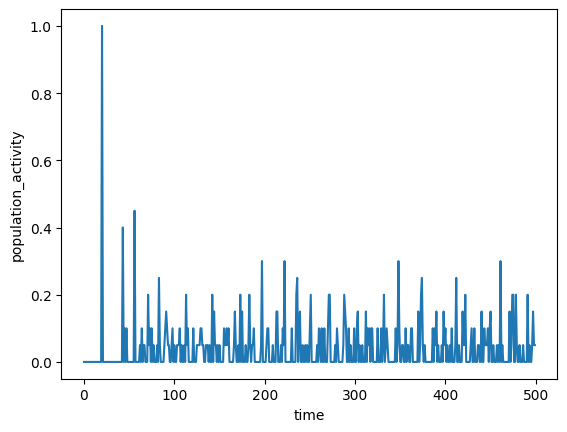

In [16]:
# plt.plot(net["v", 0][:,:20])
# plt.plot(net["v", 1][:,:20])
# plt.xlabel("time")
# plt.ylabel("v")
# plt.show()
# plt.plot(net["I", 0][:,:20])
# plt.plot(net["I", 1][:,:20])
# plt.xlabel("time")
# plt.ylabel("I")
# plt.show()
# plt.figure(figsize=(10, 7))
# plt.scatter(net["spike", 0][:,0], net["spike", 0][:,1])
# plt.xlabel("time")
# plt.ylabel("spike")
# x = []
# for w in net["spike", 1]:
#     x.append(w[1] + 80)
# plt.scatter(net["spike", 1][:,0], x)
# # plt.scatter(net["spike", 1][:,0], net["spike", 1][:,1])
# plt.show()
# print(torch.sum(net["spike",0][:, 0] == 19).item())
pop_act1 = []
pop_act2 = []
time = []
for t in range(500):
    spikes = torch.sum(net["spike",0][:, 0] == t).item()
    pop_act1.append(spikes/80)
    spikes = torch.sum(net["spike",1][:, 0] == t).item()
    pop_act2.append(spikes/20)
    time.append(t)

plt.plot(pop_act2[:])
plt.xlabel("time")
plt.ylabel("population_activity")
plt.show()
